In [44]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator

In [45]:
# Initializing the CNN

np.random.seed(1337)
classifier = Sequential()

classifier.add(Convolution2D(32, 3, 3, input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# classifier.add(Convolution2D(8, 3, 3, activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))



classifier.add(Flatten())

#hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.5))

#output layer
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())
#plot_model(classifier, show_shapes=True, to_file='PlantVillage_CNN.png')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 42, 42, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 16)          4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 144)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [46]:
#Part 2 - fitting the data set

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )
label_map = (training_set.class_indices)

print(label_map)

test_set = test_datagen.flow_from_directory(
        'val',
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')


# fitting the model
classifier.fit_generator(
        training_set,
        steps_per_epoch=25,
        epochs=300,
        validation_data=test_set,
        validation_steps=50)


classifier.save_weights('keras_potato_trained_model_weights.h5')
print('Saved trained model as %s ' % 'keras_potato_trained_model_weights.h5')


Found 10000 images belonging to 10 classes.
{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Found 1000 images belonging to 10 classes.


C:\Users\andre\AppData\Local\Temp\ipykernel_4204\116701429.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/300
25/25 [==============================] - 10s 377ms/step - loss: 2.3042 - accuracy: 0.1082 - val_loss: 2.2954 - val_accuracy: 0.1070
Epoch 2/300
25/25 [==============================] - 7s 289ms/step - loss: 2.2858 - accuracy: 0.1238
Epoch 3/300
25/25 [==============================] - 7s 286ms/step - loss: 2.2458 - accuracy: 0.1713
Epoch 4/300
25/25 [==============================] - 7s 272ms/step - loss: 2.1690 - accuracy: 0.1972
Epoch 5/300
25/25 [==============================] - 7s 279ms/step - loss: 2.0903 - accuracy: 0.2375
Epoch 6/300
25/25 [==============================] - 7s 271ms/step - loss: 1.9655 - accuracy: 0.3075
Epoch 7/300
25/25 [==============================] - 7s 270ms/step - loss: 1.8400 - accuracy: 0.3531
Epoch 8/300
25/25 [==============================] - 7s 270ms/step - loss: 1.7418 - accuracy: 0.3856
Epoch 9/300
25/25 [==============================] - 7s 272ms/step - loss: 1.6453 - accuracy: 0.4450
Epoch 10/300
25/25 [============================

2/2 [==============================] - 0s 6ms/step


c:\Users\andre\anaconda3\envs\leaf_cse120_20240303\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\andre\anaconda3\envs\leaf_cse120_20240303\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


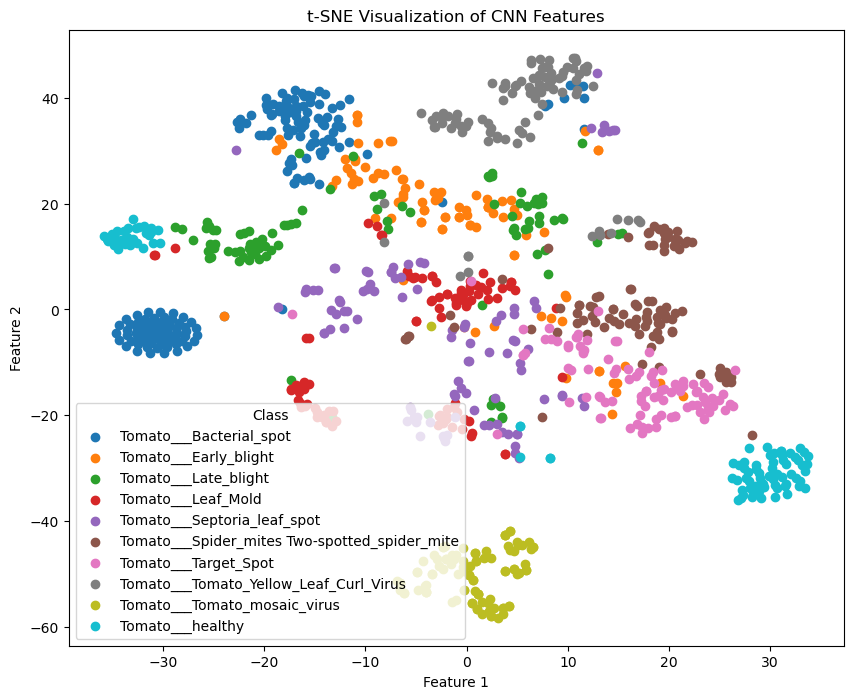

In [47]:
import numpy as np
from keras.models import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define a new model that outputs the feature representations
feature_extractor = Model(inputs=classifier.input, outputs=classifier.layers[-2].output)

# Extract features for all images in the validation set
num_images = len(test_set)
num_features = 128  # The number of units in the Dense layer

features = np.zeros((num_images * test_set.batch_size, num_features))
labels = np.zeros((num_images * test_set.batch_size))

for i in range(num_images):
    batch_x, batch_y = test_set[i]
    batch_size = batch_x.shape[0]
    features[i * batch_size: (i + 1) * batch_size] = feature_extractor.predict(batch_x)
    labels[i * batch_size: (i + 1) * batch_size] = np.argmax(batch_y, axis=1)

# Apply t-SNE to reduce dimensionality to 2 for visualization
tsne = TSNE(n_components=2, random_state=0)
embedded_features = tsne.fit_transform(features)

# Plot the clusters
plt.figure(figsize=(10, 8))
for class_label, class_index in label_map.items():
    indices = labels == class_index
    plt.scatter(embedded_features[indices, 0], embedded_features[indices, 1], label=class_label)

plt.title('t-SNE Visualization of CNN Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Class')
plt.show()


In [48]:
# Find the largest cluster
largest_cluster_label = np.argmax(np.bincount(labels.astype(int)))

# Find the instances belonging to the largest cluster
largest_cluster_indices = np.where(labels == largest_cluster_label)[0]

# Get the class label for the largest cluster
largest_cluster_class = None
for class_label, class_index in label_map.items():
    if class_index == largest_cluster_label:
        largest_cluster_class = class_label
        break

if largest_cluster_class is not None:
    print(f"The largest cluster belongs to class '{largest_cluster_class}'.")
else:
    print("Error: Unable to find the class label for the largest cluster.")

# Save the images from the largest cluster
import shutil

for idx in largest_cluster_indices:
    if idx < len(test_set.filepaths):  # Check if the index is within range
        image_path = test_set.filepaths[idx]
        image_name = os.path.basename(image_path)
        shutil.copy(image_path, os.path.join(save_folder, image_name))
    else:
        print("Index out of range:", idx)

if largest_cluster_class is not None:
    print(f"Images from the largest cluster ({largest_cluster_class}) have been saved to '{save_folder}'.")
else:
    print("Error: Unable to save images from the largest cluster due to missing class label.")


The largest cluster belongs to class 'Tomato___Bacterial_spot'.
Index out of range: 1000
Index out of range: 1001
Index out of range: 1002
Index out of range: 1003
Index out of range: 1004
Index out of range: 1005
Index out of range: 1006
Index out of range: 1007
Index out of range: 1008
Index out of range: 1009
Index out of range: 1010
Index out of range: 1011
Index out of range: 1012
Index out of range: 1013
Index out of range: 1014
Index out of range: 1015
Index out of range: 1016
Index out of range: 1017
Index out of range: 1018
Index out of range: 1019
Index out of range: 1020
Index out of range: 1021
Index out of range: 1022
Index out of range: 1023
Images from the largest cluster (Tomato___Bacterial_spot) have been saved to 'largest_cluster_images'.


In [49]:
# Find the smallest cluster
smallest_cluster_label = np.argmin(np.bincount(labels.astype(int)))

# Find the instances belonging to the smallest cluster
smallest_cluster_indices = np.where(labels == smallest_cluster_label)[0]

# Get the class label for the smallest cluster
smallest_cluster_class = None
for class_label, class_index in label_map.items():
    if class_index == smallest_cluster_label:
        smallest_cluster_class = class_label
        break

if smallest_cluster_class is not None:
    print(f"The smallest cluster belongs to class '{smallest_cluster_class}'.")
else:
    print("Error: Unable to find the class label for the smallest cluster.")

# Save the images from the smallest cluster
import shutil

for idx in smallest_cluster_indices:
    if idx < len(test_set.filepaths):  # Check if the index is within range
        image_path = test_set.filepaths[idx]
        image_name = os.path.basename(image_path)
        shutil.copy(image_path, os.path.join(save_folder, image_name))
    else:
        print("Index out of range:", idx)

if smallest_cluster_class is not None:
    print(f"Images from the smallest cluster ({smallest_cluster_class}) have been saved to '{save_folder}'.")
else:
    print("Error: Unable to save images from the smallest cluster due to missing class label.")


The smallest cluster belongs to class 'Tomato___Early_blight'.
Images from the smallest cluster (Tomato___Early_blight) have been saved to 'largest_cluster_images'.


In [50]:
import numpy as np

# Get the counts of each class
class_counts = np.bincount(labels.astype(int))

# Find the indices of the top three smallest clusters
smallest_cluster_indices = np.argsort(class_counts)[:8]

# Iterate through the top three smallest clusters
for cluster_label in smallest_cluster_indices:
    # Find the instances belonging to the cluster
    cluster_indices = np.where(labels == cluster_label)[0]
    
    # Get the class label for the cluster
    cluster_class = None
    for class_label, class_index in label_map.items():
        if class_index == cluster_label:
            cluster_class = class_label
            break
    
    # Print cluster information
    if cluster_class is not None:
        print(f"Cluster with class '{cluster_class}' has {len(cluster_indices)} instances.")
    else:
        print(f"Cluster with label '{cluster_label}' has {len(cluster_indices)} instances.")


Cluster with class 'Tomato___Early_blight' has 93 instances.
Cluster with class 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' has 93 instances.
Cluster with class 'Tomato___healthy' has 95 instances.
Cluster with class 'Tomato___Late_blight' has 97 instances.
Cluster with class 'Tomato___Leaf_Mold' has 97 instances.
Cluster with class 'Tomato___Septoria_leaf_spot' has 97 instances.
Cluster with class 'Tomato___Spider_mites Two-spotted_spider_mite' has 97 instances.
Cluster with class 'Tomato___Target_Spot' has 97 instances.


In [51]:
import numpy as np

# Calculate the spread of 'tomato_Healthy' class
tomato_healthy_label = label_map['Tomato___healthy']
tomato_healthy_indices = np.where(labels == tomato_healthy_label)[0]
tomato_healthy_embeddings = embedded_features[tomato_healthy_indices]

# Calculate the spread based on the distance between instances
spread_distances = []
for i in range(len(tomato_healthy_embeddings)):
    for j in range(i + 1, len(tomato_healthy_embeddings)):
        distance = np.linalg.norm(tomato_healthy_embeddings[i] - tomato_healthy_embeddings[j])
        spread_distances.append(distance)

# Rank the spread distances in ascending order
ranked_spread_distances = sorted(spread_distances)

# Find the index of the class "tomato_Healthy" in the sorted list
tomato_healthy_rank = ranked_spread_distances.index(np.mean(spread_distances))

print(f"The spread of class 'tomato_Healthy' is ranked #{tomato_healthy_rank + 1} among all classes.")



ValueError: 36.35372 is not in list